<a href="https://colab.research.google.com/github/ChinmayRojatkar/Predicting-sentiment-of-COVID-19-tweets/blob/main/Predicting_sentiment_of_COVID_19_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of post-COVID tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of post-COVID tweets.The tweets have been pulled from Twitter and manual tagging has been done then.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import re
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
#df=pd.read_csv('/content/drive/MyDrive/capstone project/Sentiment Analysis : Predicting sentiment of COVID-19 tweets/Coronavirus Tweets.csv',encoding="ISO-8859-1")

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/v analysis_subjectivity_polarity_tweet_clean.csv',encoding="ISO-8859-1")
df=df.astype(str)

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Date,User,clean_Tweet,Emotions,Subjectivity,Polarity,Analysis
0,0,0,2023-01-09 23:55:12+00:00,aldotjahjadi8,China shifted Covid 19 Policy lot growth poten...,"{'fear': 0.0, 'anger': 0.3333333333333333, 'an...",1.0,0.0,Neutral
1,1,1,2023-01-09 23:52:06+00:00,KarenDa29372310,100 FACTSThe United States right cry mass shoo...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...",0.4505952380952381,0.013095238095238,Positive
2,2,2,2023-01-09 23:51:07+00:00,typo_cat,Long Covid Endemic ChinaChina soon sync rest w...,"{'fear': 0.18181818181818182, 'anger': 0.09090...",0.65,0.2749999999999999,Positive
3,3,3,2023-01-09 23:51:03+00:00,THISDAYLIVE,LETS EXTRA EFFO PULL Adaptation key characteri...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...",0.4042424242424242,0.0139393939393939,Positive
4,4,4,2023-01-09 23:48:53+00:00,Apont3Andr3s,China pide OMS imparcialidad sobre el Covid19h...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...",0.0,0.0,Neutral


In [ ]:
df.tail()

,Unnamed: 0,Unnamed: 0.1,Date,User,clean_Tweet,Emotions,Subjectivity,Polarity,Analysis
56791,56791,56791,2022-12-09 00:04:17+00:00,XHNews,past nearly years Xi Jinping leading China fig...,"{'fear': 0.06666666666666667, 'anger': 0.13333...",0.6625,0.0875,Positive
56792,56792,56792,2022-12-09 00:03:11+00:00,txt_ipin,Inflation Rate CountriesPolitical tensions Rus...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...",0.0,0.0,Neutral
56793,56793,56793,2022-12-09 00:00:45+00:00,thechinaproj,experts warn China facing possibility massive ...,"{'fear': 0.16666666666666666, 'anger': 0.0, 'a...",1.0,0.0,Neutral
56794,56794,56794,2022-12-09 00:00:01+00:00,sinoprise,British Chamber Commerce China welcomed Chines...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...",0.0833333333333333,0.0,Neutral
56795,56795,56795,2022-12-09 00:00:00+00:00,STopinion,Gains risks Chinas Covid19 pivot httpstco7yYTt...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't...",0.0,0.0,Neutral


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56796 entries, 0 to 56795
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    56796 non-null  object
 1   Unnamed: 0.1  56796 non-null  object
 2   Date          56796 non-null  object
 3   User          56796 non-null  object
 4   clean_Tweet   56796 non-null  object
 5   Emotions      56796 non-null  object
 6   Subjectivity  56796 non-null  object
 7   Polarity      56796 non-null  object
 8   Analysis      56796 non-null  object
dtypes: object(9)
memory usage: 3.9+ MB


LOOKING FOR NAN VALUES

In [ ]:
df.isnull().sum()

Unnamed: 0      0
Unnamed: 0.1    0
Date            0
User            0
clean_Tweet     0
Emotions        0
Subjectivity    0
Polarity        0
Analysis        0
dtype: int64

In [ ]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Date', 'User', 'clean_Tweet', 'Emotions',
       'Subjectivity', 'Polarity', 'Analysis'],
      dtype='object')

In [ ]:
df['Analysis'].value_counts()

Neutral     34171
Positive    13950
Negative     8675
Name: Analysis, dtype: int64

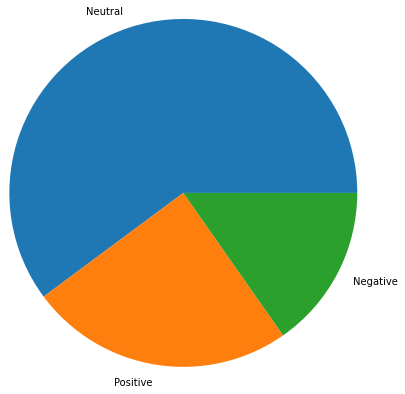

In [ ]:
df_sent = df['Analysis'].value_counts()

plt.pie(df_sent, labels = df_sent.index,radius=2);

Neutral has the highest Sentiment


In [ ]:
df.clean_Tweet

0        China shifted Covid 19 Policy lot growth poten...
1        100 FACTSThe United States right cry mass shoo...
2        Long Covid Endemic ChinaChina soon sync rest w...
3        LETS EXTRA EFFO PULL Adaptation key characteri...
4        China pide OMS imparcialidad sobre el Covid19h...
                               ...                        
56791    past nearly years Xi Jinping leading China fig...
56792    Inflation Rate CountriesPolitical tensions Rus...
56793    experts warn China facing possibility massive ...
56794    British Chamber Commerce China welcomed Chines...
56795    Gains risks Chinas Covid19 pivot httpstco7yYTt...
Name: clean_Tweet, Length: 56796, dtype: object

In [ ]:
range(0,len(df.clean_Tweet))

range(0, 56796)

## Text Analysis of tweet

In [ ]:
pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 KB 11.9 MB/s eta 0:00:00


In [ ]:
import neattext.functions as nfx

In [ ]:
# Methods/Attrib
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [ ]:
df['clean_Tweet'].iloc[5]

'says requires travelers China negative Covid19 test results new rules effective January 5th 2023China Covid Pandemic whitelungs CM2 Omicron Delta httpstcothjrdlLDSs'

Noise
1. remove mentions/userhandles
2. remove hashtags
3. urls
4. emojis
5. special char

In [ ]:
df['clean_Tweet'].head(10)

0    China shifted Covid 19 Policy lot growth poten...
1    100 FACTSThe United States right cry mass shoo...
2    Long Covid Endemic ChinaChina soon sync rest w...
3    LETS EXTRA EFFO PULL Adaptation key characteri...
4    China pide OMS imparcialidad sobre el Covid19h...
5    says requires travelers China negative Covid19...
6    China pide OMS imparcialidad sobre el Covid19h...
7    Guyana CARICOM country impose new entry requir...
8    DEMOND FAUCI KNOW JANUARY 2017 COVID GOING COM...
9    China outlook improves global central banks bo...
Name: clean_Tweet, dtype: object

In [ ]:
df['clean_Tweet'].apply(nfx.extract_hashtags)

0        []
1        []
2        []
3        []
4        []
         ..
56791    []
56792    []
56793    []
56794    []
56795    []
Name: clean_Tweet, Length: 56796, dtype: object

In [ ]:
df['extracted_hashtags'] = df['clean_Tweet'].apply(nfx.extract_hashtags)

In [ ]:
df[['extracted_hashtags','clean_Tweet']]

,extracted_hashtags,clean_Tweet
0,[],China shifted Covid 19 Policy lot growth poten...
1,[],100 FACTSThe United States right cry mass shoo...
2,[],Long Covid Endemic ChinaChina soon sync rest w...
3,[],LETS EXTRA EFFO PULL Adaptation key characteri...
4,[],China pide OMS imparcialidad sobre el Covid19h...
...,...,...
56791,[],past nearly years Xi Jinping leading China fig...
56792,[],Inflation Rate CountriesPolitical tensions Rus...
56793,[],experts warn China facing possibility massive ...
56794,[],British Chamber Commerce China welcomed Chines...


In [ ]:
##Removing Hashtags
df['clean_tweet'] = df['clean_Tweet'].apply(nfx.remove_hashtags)

In [ ]:
df[['clean_Tweet','clean_tweet']]

,clean_Tweet,clean_tweet
0,China shifted Covid 19 Policy lot growth poten...,China shifted Covid 19 Policy lot growth poten...
1,100 FACTSThe United States right cry mass shoo...,100 FACTSThe United States right cry mass shoo...
2,Long Covid Endemic ChinaChina soon sync rest w...,Long Covid Endemic ChinaChina soon sync rest w...
3,LETS EXTRA EFFO PULL Adaptation key characteri...,LETS EXTRA EFFO PULL Adaptation key characteri...
4,China pide OMS imparcialidad sobre el Covid19h...,China pide OMS imparcialidad sobre el Covid19h...
...,...,...
56791,past nearly years Xi Jinping leading China fig...,past nearly years Xi Jinping leading China fig...
56792,Inflation Rate CountriesPolitical tensions Rus...,Inflation Rate CountriesPolitical tensions Rus...
56793,experts warn China facing possibility massive ...,experts warn China facing possibility massive ...
56794,British Chamber Commerce China welcomed Chines...,British Chamber Commerce China welcomed Chines...


In [ ]:
#Removing Userhandles
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x))

In [ ]:
df[['clean_Tweet','clean_tweet']]

,clean_Tweet,clean_tweet
0,China shifted Covid 19 Policy lot growth poten...,China shifted Covid 19 Policy lot growth poten...
1,100 FACTSThe United States right cry mass shoo...,100 FACTSThe United States right cry mass shoo...
2,Long Covid Endemic ChinaChina soon sync rest w...,Long Covid Endemic ChinaChina soon sync rest w...
3,LETS EXTRA EFFO PULL Adaptation key characteri...,LETS EXTRA EFFO PULL Adaptation key characteri...
4,China pide OMS imparcialidad sobre el Covid19h...,China pide OMS imparcialidad sobre el Covid19h...
...,...,...
56791,past nearly years Xi Jinping leading China fig...,past nearly years Xi Jinping leading China fig...
56792,Inflation Rate CountriesPolitical tensions Rus...,Inflation Rate CountriesPolitical tensions Rus...
56793,experts warn China facing possibility massive ...,experts warn China facing possibility massive ...
56794,British Chamber Commerce China welcomed Chines...,British Chamber Commerce China welcomed Chines...


In [ ]:
df['clean_tweet'].iloc[15]

'China lifted quarantine requirements inbound travelers ending years selfimposed isolation country battles surge COVID19 cases httpstcoNT9bb4DVjP'

In [ ]:
# Cleaning Text: Multiple WhiteSpaces
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_multiple_spaces)

In [ ]:
df['clean_tweet'].iloc[15]

'China lifted quarantine requirements inbound travelers ending years selfimposed isolation country battles surge COVID19 cases httpstcoNT9bb4DVjP'

In [ ]:
# Cleaning Text : Remove urls
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_urls)

In [ ]:
# Cleaning Text: Punctuations
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_puncts)

In [ ]:
df[['clean_Tweet','clean_tweet']]

,clean_Tweet,clean_tweet
0,China shifted Covid 19 Policy lot growth poten...,China shifted Covid 19 Policy lot growth poten...
1,100 FACTSThe United States right cry mass shoo...,100 FACTSThe United States right cry mass shoo...
2,Long Covid Endemic ChinaChina soon sync rest w...,Long Covid Endemic ChinaChina soon sync rest w...
3,LETS EXTRA EFFO PULL Adaptation key characteri...,LETS EXTRA EFFO PULL Adaptation key characteri...
4,China pide OMS imparcialidad sobre el Covid19h...,China pide OMS imparcialidad sobre el Covid19h...
...,...,...
56791,past nearly years Xi Jinping leading China fig...,past nearly years Xi Jinping leading China fig...
56792,Inflation Rate CountriesPolitical tensions Rus...,Inflation Rate CountriesPolitical tensions Rus...
56793,experts warn China facing possibility massive ...,experts warn China facing possibility massive ...
56794,British Chamber Commerce China welcomed Chines...,British Chamber Commerce China welcomed Chines...


In [ ]:
#df['Sentiment_1'] = df['Sentiment'] #for not affecting a data we cremated a new column 

In [ ]:
df.head(1)

,Unnamed: 0,Unnamed: 0.1,Date,User,clean_Tweet,Emotions,Subjectivity,Polarity,Analysis,extracted_hashtags,clean_tweet
0,0,0,2023-01-09 23:55:12+00:00,aldotjahjadi8,China shifted Covid 19 Policy lot growth poten...,"{'fear': 0.0, 'anger': 0.3333333333333333, 'an...",1.0,0.0,Neutral,[],China shifted Covid 19 Policy lot growth poten...


In [ ]:
### Keyword Extraction
#positive_tweet = df[df['Sentiment_1'] == 'Positive']['clean_tweet']
#neutral_tweet = df[df['Sentiment_1'] == 'Neutral']['clean_tweet']
#negative_tweet = df[df['Sentiment_1'] == 'Negative']['clean_tweet']
#ext_positive_tweet =df[df['Sentiment_1'] == 'Extremely Positive']['clean_tweet']
#ext_negative_tweet = df[df['Sentiment_1'] == 'Extremely Negative']['clean_tweet']

In [ ]:
### Keyword Extraction
positive_tweet = df[df['Analysis'] == 'Positive']['clean_tweet']
neutral_tweet = df[df['Analysis'] == 'Neutral']['clean_tweet']
negative_tweet = df[df['Analysis'] == 'Negative']['clean_tweet']
ext_positive_tweet =df[df['Analysis'] == 'Extremely Positive']['clean_tweet']
ext_negative_tweet = df[df['Analysis'] == 'Extremely Negative']['clean_tweet']

In [ ]:
negative_tweet

10       scared pile dead bodies China entry Chinese CO...
11       crash covid lockdowns recession happened resul...
18       Despite massive COVID19 china careful recommen...
26       Covid 19 andd vaccines conspiracy pharmaceutic...
33       China struggling cope surging COVID19 infectio...
                               ...                        
56719    Chinas Ministry Transport Thursday published n...
56737    Chinese propaganda West paid 250 lab workers s...
56739    Retweet selected httpstcokmOCQTFIJb team China...
56754    know Govt created Covid19 funding gain functio...
56781    doesnt look like equitable count chinese died ...
Name: clean_tweet, Length: 8675, dtype: object

In [ ]:
# Remove Stopwords and Convert to Tokens
positive_tweet_list = positive_tweet.apply(nfx.remove_stopwords).tolist()
negative_tweet_list = negative_tweet.apply(nfx.remove_stopwords).tolist()
neutral_tweet_list = neutral_tweet.apply(nfx.remove_stopwords).tolist()

In [ ]:
neutral_tweet_list

['China shifted Covid 19 Policy lot growth potential unlocked travel pent demand People China substantial 3 years',
 'China pide OMS imparcialidad sobre el Covid19httpstcoBLplS7JHol',
 'China pide OMS imparcialidad sobre el Covid19httpstcoBLplS7J9yN',
 'DEMOND FAUCI KNOW JANUARY 2017 COVID GOING COME DECEMBER 2019THROUGH 2022 PEOPLE PLANED FAUCI BILL GATES CHINA BIDEN WAKE COVID 19 MONEY TRUMP httpstcoyVthPSAOYD',
 'China outlook improves global central banks border reopening despite Covid19 surge HKMA boss says httpstcoKH0GC1JvwK',
 'Covid19 China giving dust eyes world corona epidemic 5 key pieces ofevidence httpstcopfbOOBd4aK',
 'wave covid19 cases China threatens disrupt global supply chains httpstcoSqVCrANvLr',
 'Los viajeros internacionales ya pueden llegar China sin necesidad de hacer cuarentena por primera vez desde las primeras etapas de la pandemia de covid19 httpstcoyzxsQyFiNN',
 'China lifted quarantine requirements inbound travelers ending years selfimposed isolation count

In [ ]:
# Tokenization means spliting the words
# for line in positive_tweet_list:
#     print(line)
#    for token in line.split():
#        print(token)          # we are creating a lamda function and loop is running like that

In [ ]:
pos_tokens = [token for line in positive_tweet_list  for token in line.split()]
neg_tokens = [token for line in negative_tweet_list  for token in line.split()]
neut_tokens = [token for line in neutral_tweet_list  for token in line.split()]

In [ ]:
pos_tokens

['100',
 'FACTSThe',
 'United',
 'States',
 'right',
 'cry',
 'mass',
 'shootings',
 '911',
 'Covid19',
 'natural',
 'disasters',
 'etcWhen',
 'look',
 'way',
 'treated',
 'Native',
 'Americans',
 'Black',
 'people',
 'particularly',
 'Black',
 'manEntire',
 'countries',
 'Afghanistan',
 'Iraq',
 'Russia',
 'China',
 'Vietnam',
 'etc',
 'Long',
 'Covid',
 'Endemic',
 'ChinaChina',
 'soon',
 'sync',
 'rest',
 'world',
 'Covid19',
 'endemic',
 'disease',
 'South',
 'China',
 'Morning',
 'Post',
 'reportsChina',
 'battling',
 'unprecedented',
 'waves',
 'Covid19',
 'infections',
 'pivoting',
 '12',
 'LETS',
 'EXTRA',
 'EFFO',
 'PULL',
 'Adaptation',
 'key',
 'characteristic',
 'Chinas',
 'policy',
 'COVID19',
 'writesCUI',
 'Jianchun',
 'New',
 'Years',
 'eve',
 'Chinese',
 'President',
 'XI',
 'Ji',
 'httpstco7PCWRaD8GQ',
 'httpstcoWtImHwiibO',
 'says',
 'requires',
 'travelers',
 'China',
 'negative',
 'Covid19',
 'test',
 'results',
 'new',
 'rules',
 'effective',
 'January',
 '5th',
 

In [ ]:
# Get Most Commonest Keywords
from collections import Counter

In [ ]:
#creating function for getting most common words up to 20
def get_tokens(docx,num=20):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [ ]:
#creating function for getting most common top 10
def get_top_tokens(docx,num=10):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [ ]:
get_tokens(pos_tokens)

{'China': 11903,
 'COVID19': 9296,
 'Covid19': 4099,
 'new': 3582,
 'Chinas': 3158,
 'surge': 1822,
 'cases': 1608,
 'people': 1309,
 'Chinese': 1073,
 'New': 1034,
 'restrictions': 931,
 'Covid': 921,
 'measures': 898,
 'said': 863,
 'virus': 849,
 'infections': 842,
 'coronavirus': 808,
 'country': 805,
 'world': 772,
 'COVID': 767}

In [ ]:
get_top_tokens(pos_tokens)

{'China': 11903,
 'COVID19': 9296,
 'Covid19': 4099,
 'new': 3582,
 'Chinas': 3158,
 'surge': 1822,
 'cases': 1608,
 'people': 1309,
 'Chinese': 1073,
 'New': 1034}

In [ ]:
most_common_pos_words = get_tokens(pos_tokens)
most_common_neg_words = get_tokens(neg_tokens)
most_common_neut_words = get_tokens(neut_tokens)

In [ ]:
# Plot with seaborn
neg_df = pd.DataFrame(most_common_neg_words.items(),columns=['words','scores'])

In [ ]:
neg_df

,words,scores
0,China,8163
1,COVID19,5779
2,Covid19,2568
3,negative,2134
4,test,1891
5,Chinas,1289
6,require,1096
7,cases,1028
8,travelers,933
9,people,929


# MOST REPEATED NEGATIVE WORDS

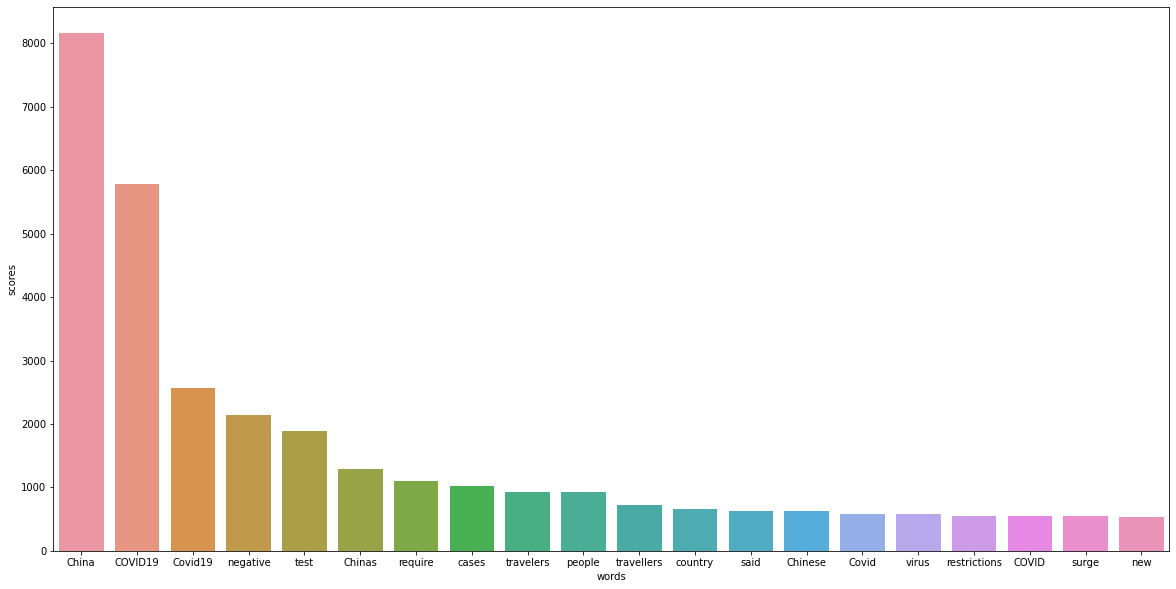

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neg_df)

# MOST REPEATED POSITIVE WORDS

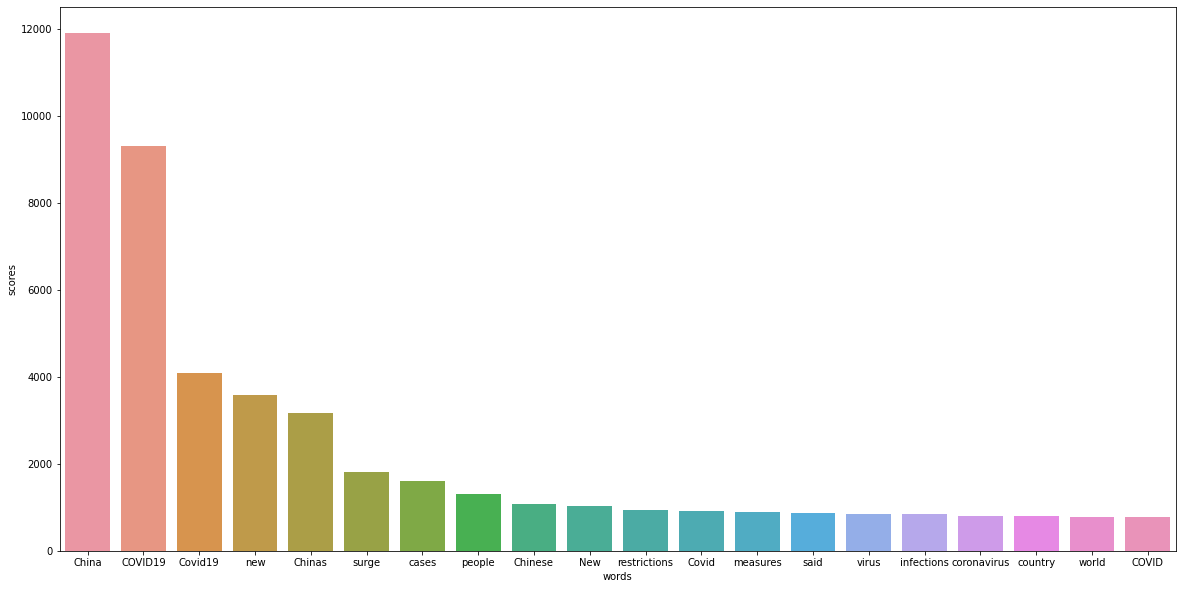

In [ ]:
pos_df = pd.DataFrame(most_common_pos_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=pos_df)

# MOST REPEATED Neutral WORDS

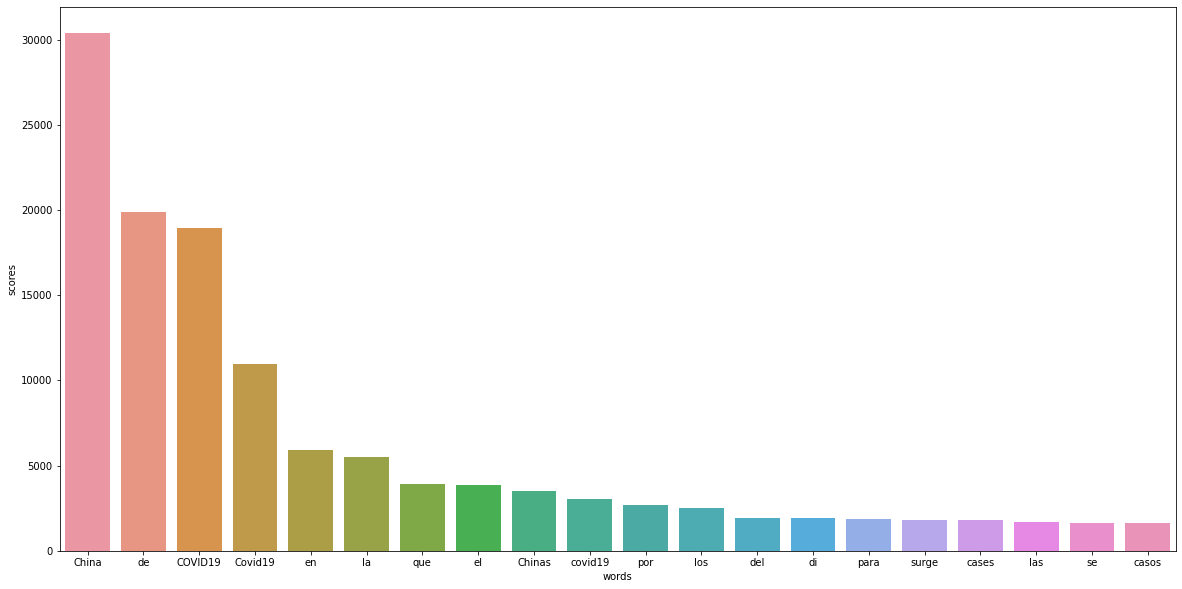

In [ ]:
neut_df = pd.DataFrame(most_common_neut_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neut_df)

TRYING ON ANOTHER WAY BY USING WORD CLOUD

In [ ]:
### Word Cloud
from wordcloud import WordCloud

In [ ]:
# CREATING A FUNCTION FOR DATA VIGULATION
def plot_wordcloud(docx):
    plt.figure(figsize=(20,10))
    mywordcloud = WordCloud().generate(docx)
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [ ]:
pos_docx = ' '.join(pos_tokens)
neg_docx = ' '.join(neg_tokens)
neu_docx = ' '.join(neut_tokens)

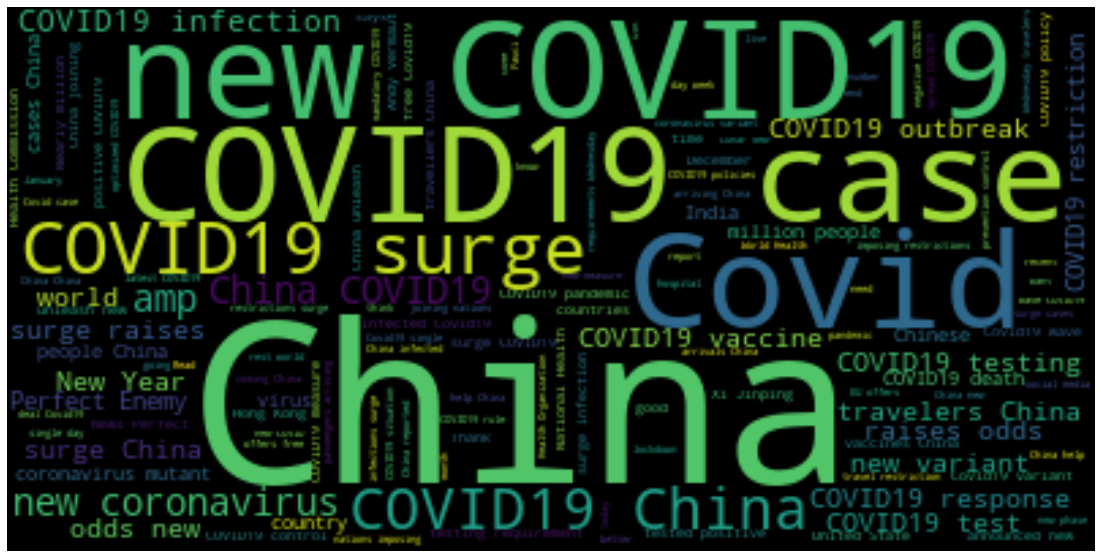

In [ ]:
plot_wordcloud(pos_docx)

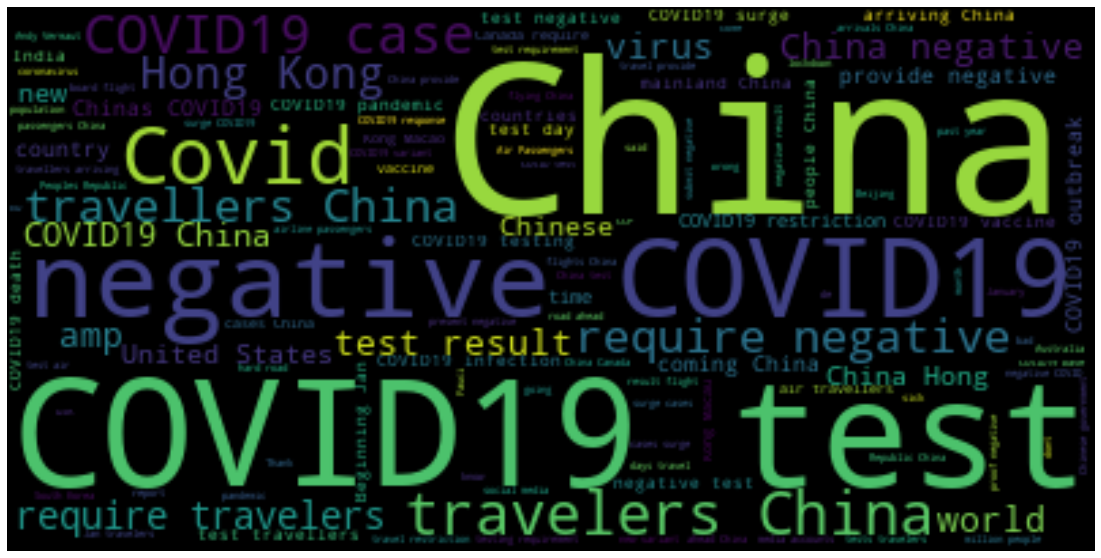

In [ ]:
plot_wordcloud(neg_docx)

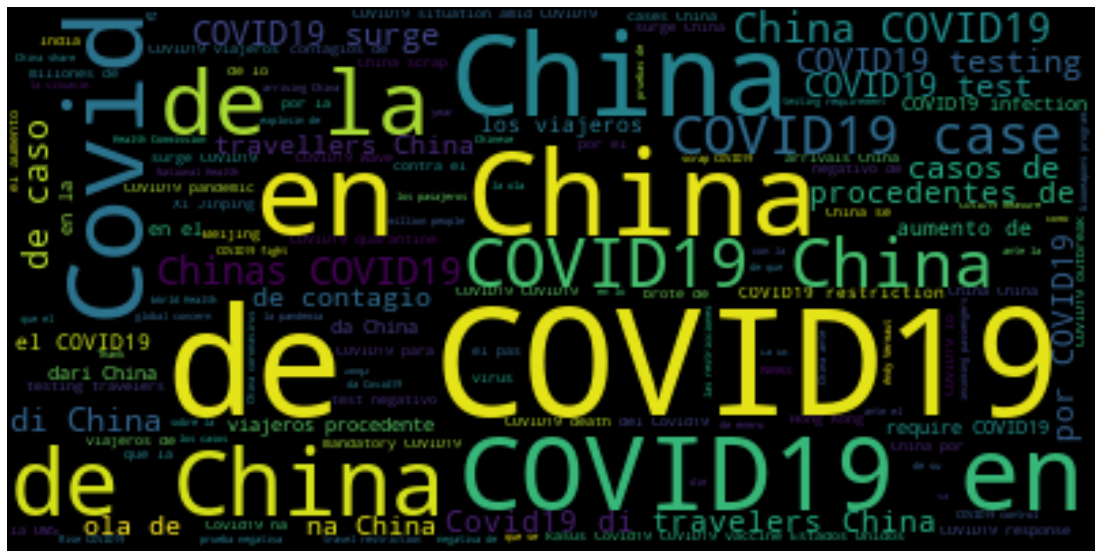

In [ ]:
plot_wordcloud(neu_docx)

## MODEL TRAINING

In [ ]:
clean_tweet = df['clean_tweet'] 

In [ ]:
#one hot encoding
sentiment_map = {"Extremely Negative":-1, "Negative":-1,"Neutral":0, "Positive":1,"Extremely Positive":1}
df['Analysis'] = df['Analysis'].map(sentiment_map)

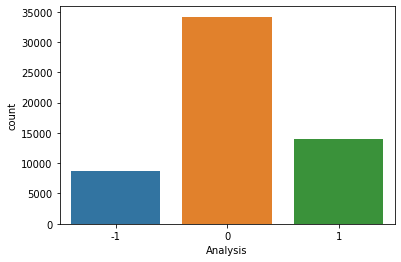

In [ ]:
sns.countplot(x='Analysis', data=df)

# DIVIDING OUR DATASET INTO TRAINING AND TESTING

In [ ]:
new_df = df #To protect the data frem we created new data frem as copy

In [ ]:
new_df.head(1)

,Unnamed: 0,Unnamed: 0.1,Date,User,clean_Tweet,Emotions,Subjectivity,Polarity,Analysis,extracted_hashtags,clean_tweet
0,0,0,2023-01-09 23:55:12+00:00,aldotjahjadi8,China shifted Covid 19 Policy lot growth poten...,"{'fear': 0.0, 'anger': 0.3333333333333333, 'an...",1.0,0.0,0,[],China shifted Covid 19 Policy lot growth poten...


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
new_df['clean_tweet'].apply(lambda x: [item for item in x if item not in stop])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0        [C, h, n,  , h, f, e,  , C, v,  , 1, 9,  , P, ...
1        [1, 0, 0,  , F, A, C, T, S, T, h, e,  , U, n, ...
2        [L, n, g,  , C, v,  , E, n, e, c,  , C, h, n, ...
3        [L, E, T, S,  , E, X, T, R, A,  , E, F, F, O, ...
4        [C, h, n,  , p, e,  , O, M, S,  , p, r, c, l, ...
                               ...                        
56791    [p,  , n, e, r, l,  , e, r,  , X,  , J, n, p, ...
56792    [I, n, f, l, n,  , R, e,  , C, u, n, r, e, P, ...
56793    [e, x, p, e, r,  , w, r, n,  , C, h, n,  , f, ...
56794    [B, r, h,  , C, h, b, e, r,  , C, e, r, c, e, ...
56795    [G, n,  , r, k,  , C, h, n,  , C, v, 1, 9,  , ...
Name: clean_tweet, Length: 56796, dtype: object

In [ ]:
ps=PorterStemmer()
lem=WordNetLemmatizer()

In [ ]:
corpus=[]
for i in range(0,len(new_df)):
  review=re.sub('[^a-zA-Z]'," ",new_df['clean_tweet'][i])
  review=review.lower()
  review=review.split()
  review=[ps.stem(word) for word in review if word not in set(stopwords.words('english'))]
  review=" ".join(review)
  corpus.append(review)

In [ ]:
new_df1 = new_df[['clean_tweet', 'Analysis']]
new_df1.shape

(56796, 2)

In [ ]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(new_df1,test_size = 0.2,random_state=24,stratify = new_df1.Analysis.values) 
print("train shape : ", train.shape)
print("test shape : ", test.shape)

train shape :  (45436, 2)
test shape :  (11360, 2)


## Use Of Counter Vectorizer For Multi Class Classification for the best accuracy 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.clean_tweet.values)
X_test = vectorizer.transform(test.clean_tweet.values)

y_train = train.Analysis.values
y_test = test.Analysis.values

print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

X_train.shape :  (45436, 96605)
X_test.shape :  (11360, 96605)
y_train.shape :  (45436,)
y_test.shape :  (11360,)


# Naive Bayes Classifier for MULTICLASS Classification

In [ ]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_test)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_test))

training accuracy Score    :  0.8025574434369223
Validation accuracy Score :  0.7548415492957746
              precision    recall  f1-score   support

          -1       0.69      0.71      0.70      1696
           0       0.70      0.98      0.82      4855
           1       0.94      0.54      0.69      4809

    accuracy                           0.75     11360
   macro avg       0.77      0.74      0.73     11360
weighted avg       0.80      0.75      0.74     11360



In [ ]:
mlb = MultinomialNB()
mlb.fit(X_train,y_train)
y_pred=mlb.predict(X_test)
cross_val_score(mlb,X_train,y_train,cv=10,scoring='accuracy').mean()

0.7186812516082628

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
Y_pred_rf = rf.predict(X_test)

In [ ]:
accuracy_rf=accuracy_score(y_test,Y_pred_rf)
accuracy_rf

0.9159330985915493

# RANDOM FOREST CLASSIFIER FOR BINARY CLASSIFICATION

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_test))

Training accuracy Score    :  1.0
Validation accuracy Score :  0.9161091549295775
              precision    recall  f1-score   support

          -1       0.72      0.95      0.82      1309
           0       1.00      0.90      0.95      7524
           1       0.85      0.94      0.89      2527

    accuracy                           0.92     11360
   macro avg       0.85      0.93      0.88     11360
weighted avg       0.93      0.92      0.92     11360



# LOGISTIC REGRESSION(BINARY CLASSIFICATION)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_test))

Training accuracy Score    :  0.9981952636675764
Validation accuracy Score :  0.9560739436619718
              precision    recall  f1-score   support

          -1       0.85      0.96      0.90      1551
           0       0.99      0.96      0.98      7110
           1       0.92      0.96      0.94      2699

    accuracy                           0.96     11360
   macro avg       0.92      0.96      0.94     11360
weighted avg       0.96      0.96      0.96     11360



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# XG BOOST( BINARY CLASSIFICATION)

In [ ]:
#takes huge amount of time to execute
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test,xgb_prediction)
print("Training accuracy Score: ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score: ",xgb_accuracy )
print(classification_report(xgb_prediction,y_test))

Training accuracy Score:  0.8161810018487543
Validation accuracy Score:  0.8137323943661972
              precision    recall  f1-score   support

          -1       0.43      0.93      0.59       806
           0       1.00      0.78      0.88      8750
           1       0.60      0.92      0.72      1804

    accuracy                           0.81     11360
   macro avg       0.68      0.88      0.73     11360
weighted avg       0.90      0.81      0.83     11360



## SUPPORT VECTOR MACHINE(BINARY CLASSIFICATION)

In [ ]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_test))

# Winning model

## Stochastic Gradient Descent-SGD Classifier( BINARY CLASSIFICATION)

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_test)
sgd_accuracy = accuracy_score(y_test,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_test))

Training accuracy Score    :  0.9943657012060921
Validation accuracy Score :  0.965669014084507
              precision    recall  f1-score   support

          -1       0.89      0.96      0.92      1611
           0       1.00      0.97      0.98      7043
           1       0.94      0.97      0.95      2706

    accuracy                           0.97     11360
   macro avg       0.94      0.96      0.95     11360
weighted avg       0.97      0.97      0.97     11360



In [ ]:
# Get the predicted classes
train_class_preds = sgd_clf.predict(X_train)
test_class_preds = sgd_clf.predict(X_test)

[[ 6822    55    63]
 [   16 27306    14]
 [   53    55 11052]]


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')]

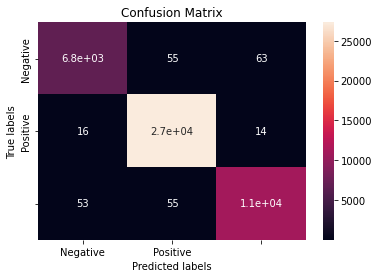

In [ ]:
# Get the confusion matrix for both train and test. We are getting very low type and type 2 errors.

labels = ['Negative', 'Positive']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Let's check the overall accuracy. Overall accuracy is very good.
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

y_pred = sgd_clf.predict(X_test)

score =accuracy_score(y_test,y_pred)
print('accuracy is', score)

accuracy is 0.965669014084507


In [ ]:
#score is mean accuracy
scikit_score = sgd_clf.score(X_test,y_test)
print('scikit score:', scikit_score)

scikit score: 0.965669014084507


In [ ]:
# Very low type 1 and type 2 error
confusion_matrix(y_test,y_pred)

array([[1545,  111,   79],
       [  15, 6809,   11],
       [  51,  123, 2616]])

## EVALUATION OF ALL BINARY CLASSIFICATION MODELS

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'XGBoost',],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
              rf_accuracy, NB_accuracy, 
              sgd_accuracy, xgb_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
4,Stochastic Gradient Decent,0.965669
1,Logistic Regression,0.956074
0,Support Vector Machines,0.929225
2,Random Forest,0.916109
5,XGBoost,0.813732
3,Naive Bayes,0.754842


# Concluson

We described the preprocessing steps, and pipeline steps within which text
normalization and model cross-validation is included, and performance
has been measured using balanced accuracy, f1 score etc. We
concentrated on feeding our model with word count information. We
assume, in the case of binary classification, we can further improve this
score.